In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

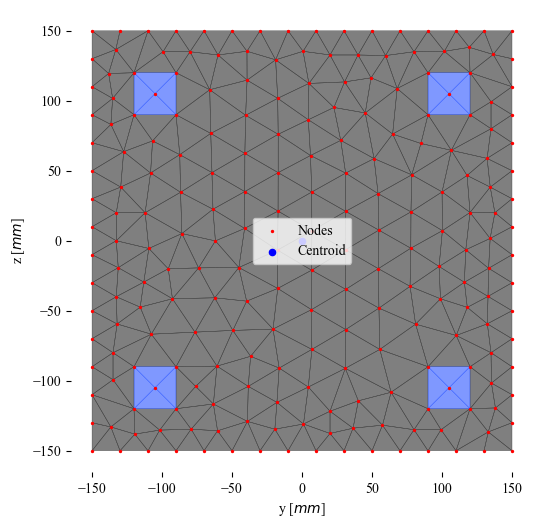

╒════════════════════╤══════════╕
│ Mesh Type          │ triangle │
├────────────────────┼──────────┤
│ Number of elements │ 382      │
├────────────────────┼──────────┤
│ Number of nodes    │ 222      │
├────────────────────┼──────────┤
│ Cross Section Area │ 90000.00 │
╘════════════════════╧══════════╛
╒═══════════════════╤══════════════╤══════════════╕
│                   │            y │            z │
╞═══════════════════╪══════════════╪══════════════╡
│ Centroid          │        -0.00 │        -0.00 │
├───────────────────┼──────────────┼──────────────┤
│ Moment of inertia │ 675000000.00 │ 675000000.00 │
╘═══════════════════╧══════════════╧══════════════╛


In [2]:
ReinforcedConcrete = Simple_RC_Column(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 30)
mesh = Mesh(ReinforcedConcrete, "triangle", 20)
mesh.plot()
mesh.print()

In [3]:
struc = structure.Cantilever(beam   = mesh, 
						   	 length = 2000,
						   	 load_DOFs = [8],
						   	 nodal_loads = [1],
						   	 number_of_sections_per_elemnt = 10)

In [4]:
non_linear_solver = solver.Nonlinear(struc, 
									 constraint="Displacement", 
									 controlled_DOF = 8,
									 section_max_iter = 500)

In [5]:
#increments = np.zeros(200)
#increments.fill(0.5)
increments = [5,5,5,5,5,5,5]

u_history , lambda_history  = non_linear_solver.solve(increments)

  0%|          | 0/7 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 7
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
            Element iteration  3
            Element iteration  4
      Residuals Norm  3116172.884379603
      llambda -29562.58875772319
      u       -5.0
      NR Iteration  1
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
      Residuals Norm  311539.2558232141
      llambda -20976.235724323276
      u       -5.0
      NR Iteration  2
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
      Residuals Norm  124931.045134813
      llambda -20681.487531596766
      u       -5.0
      NR Iteration  3
         Beam Element  1
            Element iteration  0
      Residuals Norm  1.6124769733248522e-10
      llambda -2

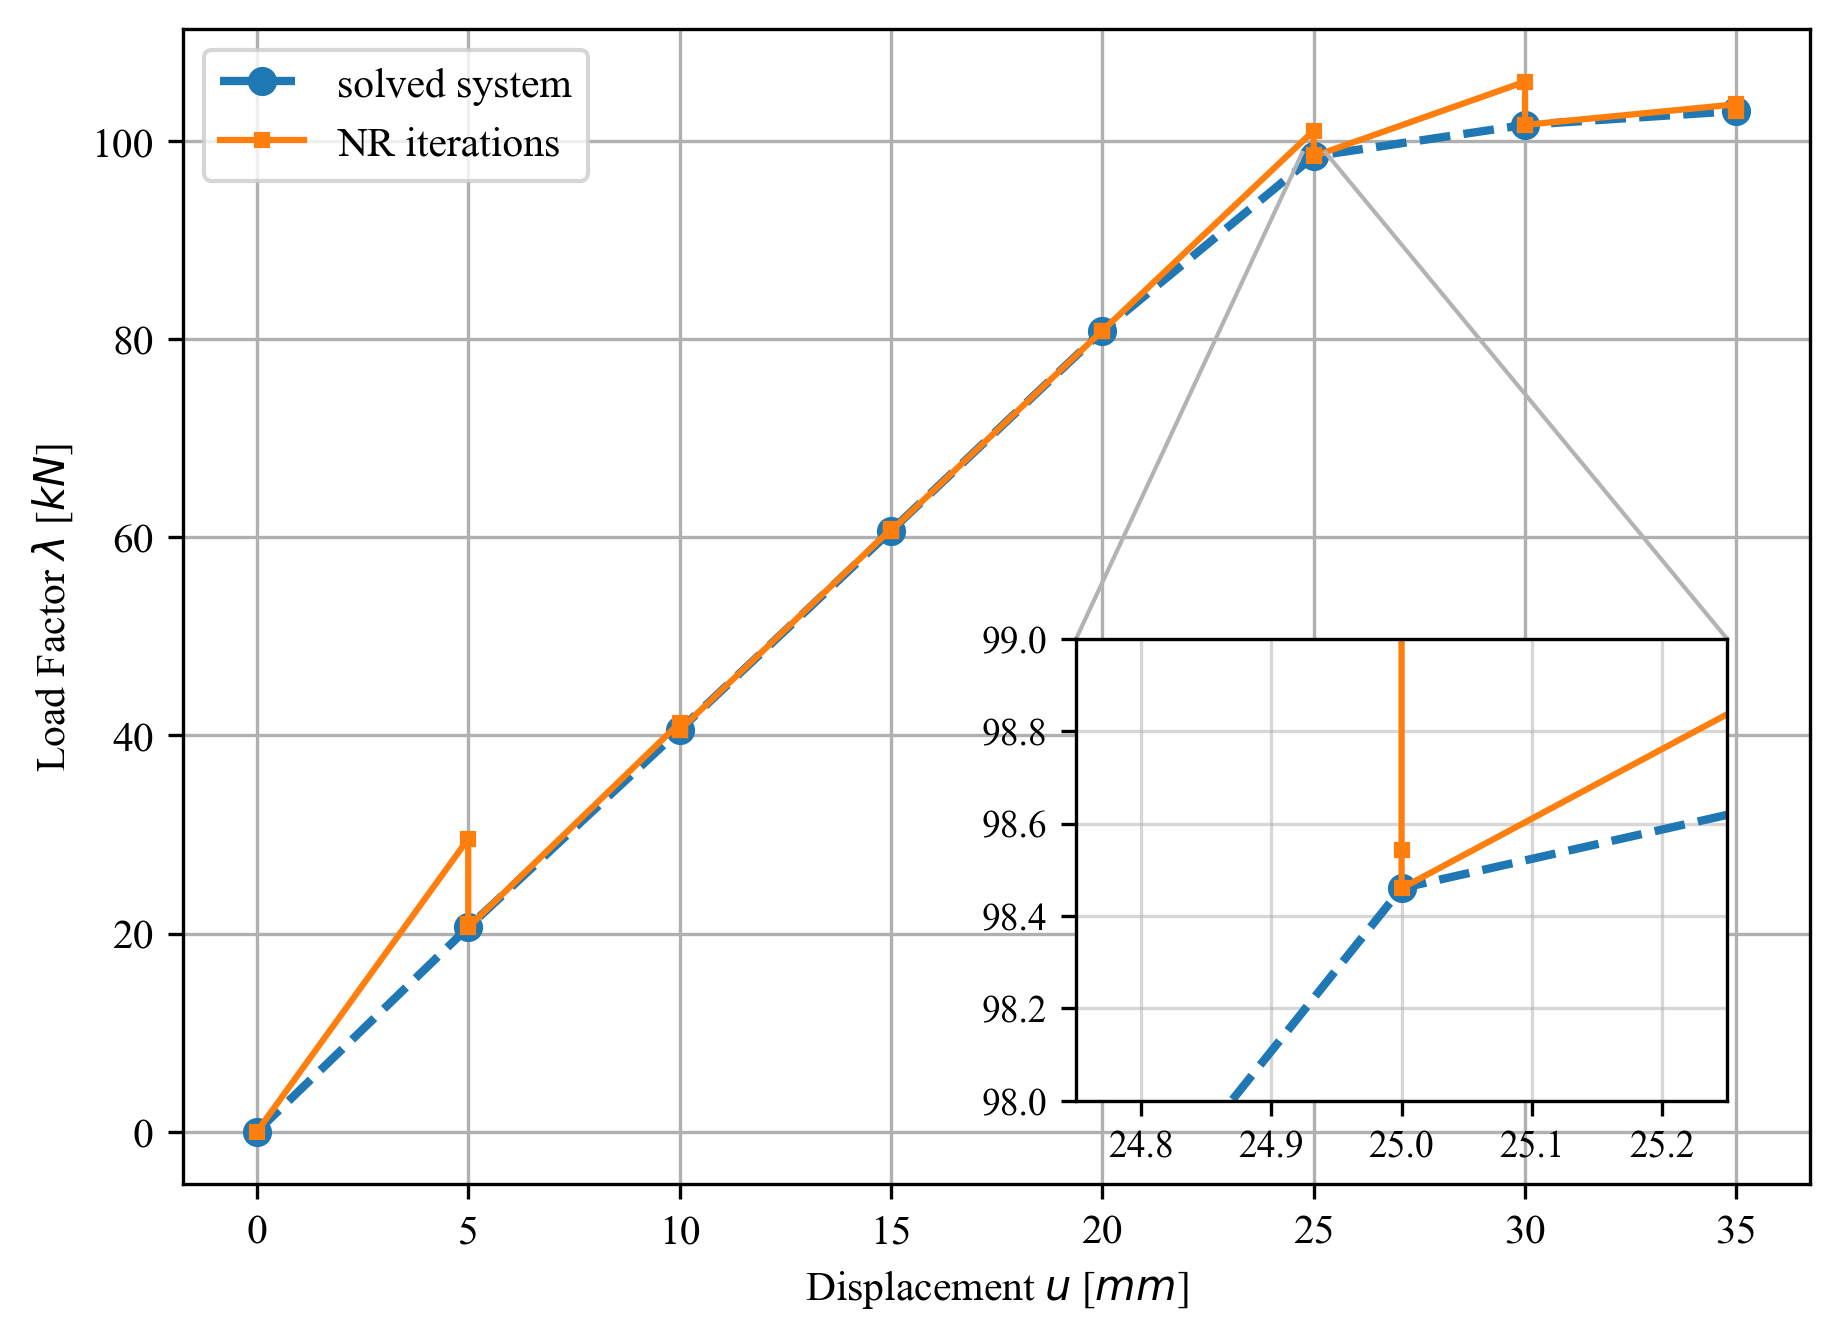

In [41]:
u = [         0,   5.0,   5.0,   5.0,   5.0,  10.0,  10.0,  10.0,  10.0,  15.0,  15.0,  15.0,  15.0,  20.0,  20.0,  20.0,   25.0,  25.0,  25.0,   30.0,   30.0,   30.0,   35.0,   35.0,   35.0]
l = np.array([0, 29562, 20976, 20681, 20632, 41265, 40596, 40547, 40544, 60817, 60676, 60658, 60653, 80871, 80838, 80836, 101046, 98543, 98460, 105994, 101641, 101634, 103712, 103035, 103029])
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300

ax.plot(u_history[:,6+2], lambda_history/1000, label="solved system", marker="o", lw=2, ls="dashed")
ax.plot(u, l/1000, label="NR iterations", marker="s", markersize=3)
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="upper left")
ax.grid()

# Inset plot
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)
axins.plot(u_history[:,6+2], lambda_history/1000, label="10 Sections", marker="o", lw=2, ls="dashed")
axins.plot(u, l/1000, label="NR iterations", marker="s", markersize=3)
axins.set_xlim(24.75, 25.25) 
axins.set_ylim(98, 99)
axins.tick_params(axis='both', which='both', labelsize=9)
axins.grid(alpha=0.5)

# Draw a box and lines to show zoom area
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.7")

plt.show()